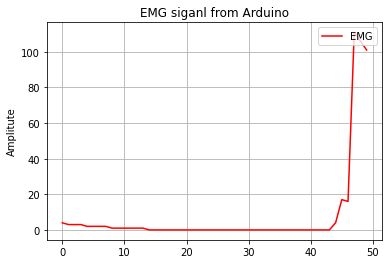

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [14]:
#visualize the arduino
import serial
import matplotlib.pyplot as plt
import atexit
import time
from IPython import display
from drawnow import *
values = []
plt.ion()

serialArduino = serial.Serial('COM3',115200)


def plotValues():
    #plt.cla()
    plt.title('EMG siganl from Arduino')
    plt.grid(True)
    plt.ylabel('Amplitute')
    plt.plot(values,'r', label='EMG')
    plt.legend(loc='upper right')
    display.clear_output(wait=True)
    #plt.pause(0.0000000001)
    
def doAtExit():
    serialArduino.close()
    print("Close serial")
    print("serialArduino.isOpen() = "+str(serialArduino.isOpen()))

atexit.register(doAtExit)#程序退出时，回调函数
print("serialArduino.isOpen() = " + str(serialArduino.isOpen()))

#预加载虚拟数据
for i in range(50):
    values.append(0)
    
while (True):
    while (serialArduino.inWaiting()==0):
        pass
    #print("readline()")
    valueRead = serialArduino.readline()
    valueRead = valueRead.decode().replace("\r","").replace("\n","")
    data = valueRead.split(",")
    data = list(map(int,data))
    #print(data)
    values.append(data[0])
    values.pop(0)
    #plotValues()
    drawnow(plotValues)

